In [118]:
#**Entrega de projeto sobre o tema Pandas** - *Diego Soek*

#Para o desenvolvimento foi utilizado a biblioteca Pandas do Python utilizando a base disponível no link http://api.bcb.gov.br/dados/serie/bcdata.sgs.20400/dados?formato=csv

In [119]:
#Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

/tmp/ipykernel_12442/2090497990.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [120]:
#Lendo o arquivo de dados
df = pd.read_csv("data/2022-09-22_Casos_Covid_19_-_Base_de_Dados.csv", sep=";")
df.head()

DATA INCLUSÃO/ NOTIFICAÇÃO CLASSIFICAÇÃO FINAL  IDADE (anos) SEXO  \
0                 11/03/2020          CONFIRMADO            54    M   
1                 12/03/2020          CONFIRMADO            15    M   
2                 12/03/2020          CONFIRMADO            46    M   
3                 12/03/2020          CONFIRMADO            25    F   
4                 12/03/2020          CONFIRMADO            58    M   

       BAIRRO DISTRITO RESIDÊNCIA INTERNADO (SIM/NÃO) DATA ÓBITO  \
0  CRISTO REI                DSMZ                 NÃO        NaN   
1       XAXIM                DSBQ                 NÃO        NaN   
2       XAXIM                DSBQ                 NÃO        NaN   
3  CRISTO REI                DSMZ                 NÃO        NaN   
4      MERCÊS                DSMZ                 NÃO        NaN   

  DATA COLETA EXAME ENCERRAMENTO  
0        09/03/2020   RECUPERADO  
1        08/03/2020   RECUPERADO  
2        09/03/2020   RECUPERADO  
3        09/03/2020   RECUPERADO  
4        09/03/2020   RECUPERADO

In [121]:
df.describe()

IDADE (anos)
count  520372.000000
mean       39.302653
std        18.001125
min         0.000000
25%        26.000000
50%        38.000000
75%        51.000000
max       107.000000

In [122]:
# Removendo colunas que não são úteis
del df['DISTRITO RESIDÊNCIA']
df.head()

DATA INCLUSÃO/ NOTIFICAÇÃO CLASSIFICAÇÃO FINAL  IDADE (anos) SEXO  \
0                 11/03/2020          CONFIRMADO            54    M   
1                 12/03/2020          CONFIRMADO            15    M   
2                 12/03/2020          CONFIRMADO            46    M   
3                 12/03/2020          CONFIRMADO            25    F   
4                 12/03/2020          CONFIRMADO            58    M   

       BAIRRO INTERNADO (SIM/NÃO) DATA ÓBITO DATA COLETA EXAME ENCERRAMENTO  
0  CRISTO REI                 NÃO        NaN        09/03/2020   RECUPERADO  
1       XAXIM                 NÃO        NaN        08/03/2020   RECUPERADO  
2       XAXIM                 NÃO        NaN        09/03/2020   RECUPERADO  
3  CRISTO REI                 NÃO        NaN        09/03/2020   RECUPERADO  
4      MERCÊS                 NÃO        NaN        09/03/2020   RECUPERADO

In [123]:
# Renomeando colunas
df.rename(columns = {'DATA INCLUSÃO/ NOTIFICAÇÃO':'DATA EVENTO', 'DATA COLETA EXAME':'DATA COLETA'}, inplace = True)
df.head()

DATA EVENTO CLASSIFICAÇÃO FINAL  IDADE (anos) SEXO      BAIRRO  \
0  11/03/2020          CONFIRMADO            54    M  CRISTO REI   
1  12/03/2020          CONFIRMADO            15    M       XAXIM   
2  12/03/2020          CONFIRMADO            46    M       XAXIM   
3  12/03/2020          CONFIRMADO            25    F  CRISTO REI   
4  12/03/2020          CONFIRMADO            58    M      MERCÊS   

  INTERNADO (SIM/NÃO) DATA ÓBITO DATA COLETA ENCERRAMENTO  
0                 NÃO        NaN  09/03/2020   RECUPERADO  
1                 NÃO        NaN  08/03/2020   RECUPERADO  
2                 NÃO        NaN  09/03/2020   RECUPERADO  
3                 NÃO        NaN  09/03/2020   RECUPERADO  
4                 NÃO        NaN  09/03/2020   RECUPERADO

In [124]:
# A coluna CLASSIFICAÇÃO FINAL não possui variação alguma então pode ser eliminada
df.groupby("CLASSIFICAÇÃO FINAL")["ENCERRAMENTO"].count()
df["CLASSIFICAÇÃO FINAL"].unique()
del df['CLASSIFICAÇÃO FINAL']
df.head()

DATA EVENTO  IDADE (anos) SEXO      BAIRRO INTERNADO (SIM/NÃO) DATA ÓBITO  \
0  11/03/2020            54    M  CRISTO REI                 NÃO        NaN   
1  12/03/2020            15    M       XAXIM                 NÃO        NaN   
2  12/03/2020            46    M       XAXIM                 NÃO        NaN   
3  12/03/2020            25    F  CRISTO REI                 NÃO        NaN   
4  12/03/2020            58    M      MERCÊS                 NÃO        NaN   

  DATA COLETA ENCERRAMENTO  
0  09/03/2020   RECUPERADO  
1  08/03/2020   RECUPERADO  
2  09/03/2020   RECUPERADO  
3  09/03/2020   RECUPERADO  
4  09/03/2020   RECUPERADO

<AxesSubplot: xlabel='ENCERRAMENTO'>

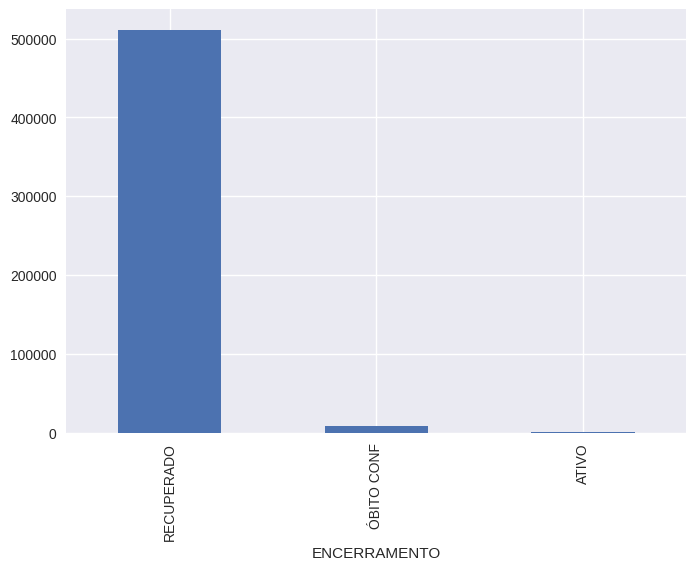

In [125]:
# Verificando os valores disponíveis na coluna de encerramento
df["ENCERRAMENTO"].unique()
df.groupby("ENCERRAMENTO")["ENCERRAMENTO"].count().sort_values(ascending = False).plot.bar()

In [126]:
#Verificando os tippos das colunas
df.dtypes

DATA EVENTO            object
IDADE (anos)            int64
SEXO                   object
BAIRRO                 object
INTERNADO (SIM/NÃO)    object
DATA ÓBITO             object
DATA COLETA            object
ENCERRAMENTO           object
dtype: object

In [127]:
#Convertendo o tipo das colunas de data
df.fillna('', inplace=True)
df.head()
df['DATA EVENTO'] = pd.to_datetime(df['DATA EVENTO'], format='%d/%m/%Y')
df['DATA ÓBITO'] = pd.to_datetime(df['DATA ÓBITO'], format='%d/%m/%Y', errors='ignore')
df['DATA COLETA'] = pd.to_datetime(df['DATA COLETA'], format='%d/%m/%Y')
df.dtypes

DATA EVENTO            datetime64[ns]
IDADE (anos)                    int64
SEXO                           object
BAIRRO                         object
INTERNADO (SIM/NÃO)            object
DATA ÓBITO                     object
DATA COLETA            datetime64[ns]
ENCERRAMENTO                   object
dtype: object

In [128]:
#Verificando como ficou
df.head()

DATA EVENTO  IDADE (anos) SEXO      BAIRRO INTERNADO (SIM/NÃO) DATA ÓBITO  \
0  2020-03-11            54    M  CRISTO REI                 NÃO              
1  2020-03-12            15    M       XAXIM                 NÃO              
2  2020-03-12            46    M       XAXIM                 NÃO              
3  2020-03-12            25    F  CRISTO REI                 NÃO              
4  2020-03-12            58    M      MERCÊS                 NÃO              

  DATA COLETA ENCERRAMENTO  
0  2020-03-09   RECUPERADO  
1  2020-03-08   RECUPERADO  
2  2020-03-09   RECUPERADO  
3  2020-03-09   RECUPERADO  
4  2020-03-09   RECUPERADO

In [129]:
#Agrupando casos de óbitos por bairros
df[df["DATA ÓBITO"] != ''].groupby(df["BAIRRO"])["BAIRRO"].count().sort_values(ascending=False)

BAIRRO
CIDADE INDUSTRIAL DE CURITIBA    831
SÍTIO CERCADO                    544
CAJURU                           529
BOQUEIRÃO                        391
UBERABA                          328
                                ... 
SÃO MIGUEL                        10
CAXIMBA                            9
TABOÃO                             9
LAMENHA PEQUENA                    2
RIVIERA                            1
Name: BAIRRO, Length: 75, dtype: int64

In [130]:
#Agrupando casos recuperados por bairros
df[df["ENCERRAMENTO"] != ''].groupby(df["BAIRRO"])["BAIRRO"].count().sort_values(ascending=False)

BAIRRO
CIDADE INDUSTRIAL DE CURITIBA    51644
SÍTIO CERCADO                    31861
CAJURU                           26136
UBERABA                          20560
BOQUEIRÃO                        20227
                                 ...  
TABOÃO                             741
CASCATINHA                         729
SÃO MIGUEL                         675
LAMENHA PEQUENA                    195
RIVIERA                             77
Name: BAIRRO, Length: 76, dtype: int64

In [131]:
#Agrupando casos por gênero
df.groupby(df["SEXO"])["SEXO"].count().sort_values(ascending=False)

SEXO
F    290739
M    229630
m         2
f         1
Name: SEXO, dtype: int64

In [133]:
#Arrumando os dados
df["SEXO"] = df["SEXO"].str.upper()
df.groupby(df["SEXO"])["SEXO"].count().sort_values(ascending=False)

SEXO
F    290740
M    229632
Name: SEXO, dtype: int64

In [145]:
#Criando coluna de faixa etária
df["FAIXA ETÁRIA"] = pd.cut(x=df["IDADE (anos)"], bins=[0,10,20,30,40,50,60,70,80,90,100,130], labels=["0-10","10-20","20-30","30-40","40-50","50-60","60-70","70-80","80-90","90-100","100+"])
df.head()

DATA EVENTO  IDADE (anos) SEXO      BAIRRO INTERNADO (SIM/NÃO) DATA ÓBITO  \
0  2020-03-11            54    M  CRISTO REI                 NÃO              
1  2020-03-12            15    M       XAXIM                 NÃO              
2  2020-03-12            46    M       XAXIM                 NÃO              
3  2020-03-12            25    F  CRISTO REI                 NÃO              
4  2020-03-12            58    M      MERCÊS                 NÃO              

  DATA COLETA ENCERRAMENTO FAIXA ETÁRIA  
0  2020-03-09   RECUPERADO        50-60  
1  2020-03-08   RECUPERADO        10-20  
2  2020-03-09   RECUPERADO        40-50  
3  2020-03-09   RECUPERADO        20-30  
4  2020-03-09   RECUPERADO        50-60

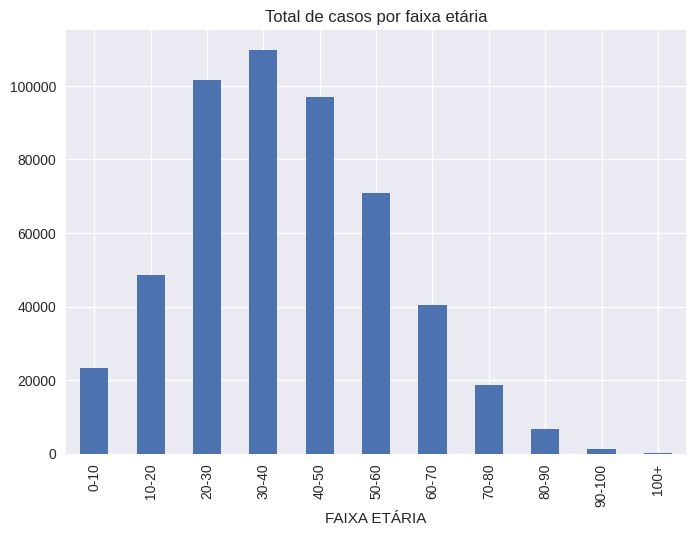

In [153]:
#Agrupamento por faixa etária
df.groupby(df["FAIXA ETÁRIA"])["FAIXA ETÁRIA"].count().plot.bar(title = "Total de casos por faixa etária");

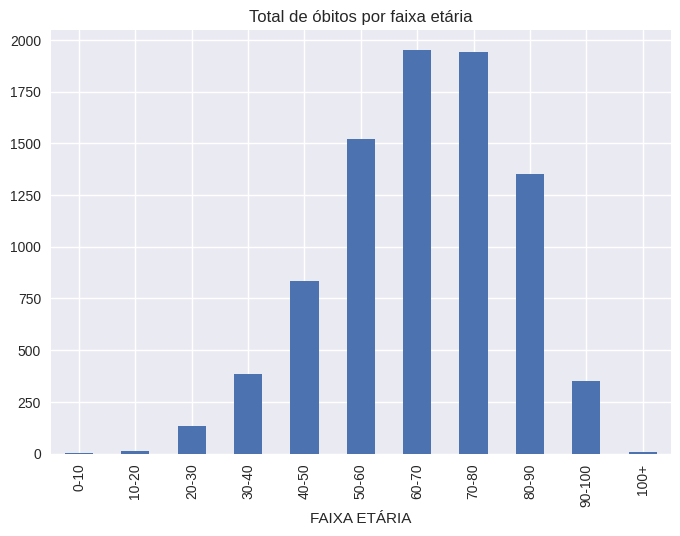

In [156]:
#Óbitos por faixa etária
df[df["DATA ÓBITO"] != ''].groupby(df["FAIXA ETÁRIA"])["FAIXA ETÁRIA"].count().plot.bar(title = "Total de óbitos por faixa etária");

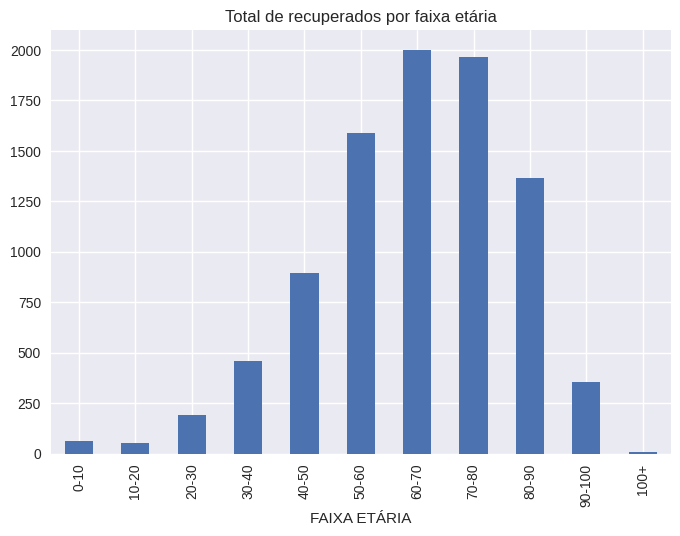

In [158]:
#Recuperados por faixa etária
df[df["ENCERRAMENTO"] != 'RECUPERADO'].groupby(df["FAIXA ETÁRIA"])["FAIXA ETÁRIA"].count().plot.bar(title = "Total de recuperados por faixa etária");